## Lab 4: Newtons Method and approximating radicals

Newtons method is a way to approximate the roots of a polynomial using an algorithm.

The equation that is used repeatedly is
$$ x_{n+1} = x_{n} + \frac{f(x_{n})}{f'(x_{n})} $$
where the point $x_{n+1}$ is the zero of the line tangent to the graph of f at $(x_n, f(x_n))$



In [1]:
# Our usual import code
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
%matplotlib inline
x, y, z = symbols('x y z')
init_printing(use_unicode=True)
e = np.e
pi = np.pi

Below is the code for Newtons Method

In [2]:
def newton(f,Df,x0,epsilon,max_iter):
    '''Approximate solution of f(x)=0 by Newton's method.

    Parameters
    ----------
    f : function
        Function for which we are searching for a solution f(x)=0.
    Df : function
        Derivative of f(x).
    x0 : number
        Initial guess for a solution f(x)=0.
    epsilon : number
        Stopping criteria is abs(f(x)) < epsilon.
    max_iter : integer
        Maximum number of iterations of Newton's method.

    Returns
    -------
    xn : number
        Implement Newton's method: compute the linear approximation
        of f(x) at xn and find x intercept by the formula
            x = xn - f(xn)/Df(xn)
        Continue until abs(f(xn)) < epsilon and return xn.
        If Df(xn) == 0, return None. If the number of iterations
        exceeds max_iter, then return None.

    Examples
    --------
    >>> f = lambda x: x**2 - x - 1
    >>> Df = lambda x: 2*x - 1
    >>> newton(f,Df,1,1e-8,10)
    Found solution after 5 iterations.
    1.618033988749989
    '''
    xn = x0
    for n in range(0,max_iter):
        fxn = f(xn)
        if abs(fxn) < epsilon:
            print('Found solution after',n,'iterations.')
            return xn
        Dfxn = Df(xn)
        if Dfxn == 0:
            print('Zero derivative. No solution found.')
            return None
        xn = xn - fxn/Dfxn
    print('Exceeded maximum iterations. No solution found.')
    return None

In [3]:
f = lambda x: x**2 - 4
Df = lambda x: 2*x
newton(f, Df, 1, 1e-8, 10)

Found solution after 5 iterations.


In [4]:
newton(f, Df, -1, 1e-8, 10)

Found solution after 5 iterations.


### Assignment
use the newton() function to find the (approximate) zeros of the following functions. Note that it will only give one value so you will have to use multiple calls of the function to find each zero

$$f(x) = \frac{x^3}{3}- 10x + 4$$

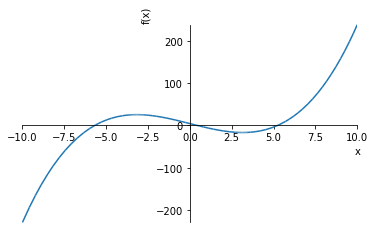

In [5]:
plot((x**3)/3 - 10*x + 4) # run this to get an idea of what the function looks like

In [97]:
f = lambda x: (x**3)/3 - 10*x + 4
Df = lambda x: x ** 2 - 10
newton(f, Df, -6, 1e-8, 10)

Found solution after 4 iterations.


In [98]:
f = lambda x: (x**3)/3 - 10*x + 4
Df = lambda x: x ** 2 - 10
newton(f, Df, -1, 1e-8, 10)

Found solution after 4 iterations.


In [99]:
f = lambda x: (x**3)/3 - 10*x + 4
Df = lambda x: x ** 2 - 10
newton(f, Df, 5, 1e-8, 10)

Found solution after 4 iterations.


### Using Newtons method to approximate square roots

We can use this process to calculate square roots. For example, say we want to find $\sqrt{2}$

$\sqrt{2}$ is a solution to the equation $x^2 - 2 = 0$ which means that it is a zero of  $x^2 - 2$

So by applying Newtons method we can get our approximation. 
I made a new function that is simpler to use for this purpose
Lets see what we get

In [95]:
def newtonSqrt(n, howmany):
    ''' Approximates a square root using Newtons method
    
    Parameters
    ----------
    n : number
        the number to approximate the squaer root of.
    howmany : number
        how many times to calculate the approximation
        
    Returns
    -------
    betterApprox : number
        The approximation of the square root
    '''
    approx = 0.5 * n
    howmany = n * 2
    for i in range(howmany):
        betterApprox = 0.5 * (approx + n/approx)
        approx = betterApprox 
        print(approx)   
    return betterApprox

In [96]:
newtonSqrt(4, 0)

2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0


### Assignment
Use this method to approximate square roots of different numbers.
Is there a way to keep track of how close an approximation gets by changing your howmany value?

Bonus assignment:
This function I made is pretty inefficient, can you make it better so if there is little to no change in the 
approximation it returns faster and more efficently?

In [64]:
newtonSqrt(4, 3)

2.0
2.0
2.0


In [65]:
newtonSqrt(10, 6)

3.5
3.178571428571429
3.162319422150883
3.1622776604441363
3.162277660168379
3.162277660168379


In [66]:
newtonSqrt(7, 6)

2.75
2.6477272727272725
2.6457520483808037
2.6457513110646933
2.6457513110645907
2.6457513110645907


In [67]:
newtonSqrt(81, 6)

21.25
12.530882352941177
9.497456198181656
9.01302783945225
9.000009415515176
9.000000000004924


In [69]:
newtonSqrt(358, 10)

90.5
47.22790055248619
27.4040827594999
20.233914807914513
18.963490647735867
18.92093578331911
18.92088792848502
18.9208879284245
18.9208879284245
18.9208879284245
